<a href="https://colab.research.google.com/github/AnnaZhuravleva/compling/blob/master/assignment_2/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as GSCV


# **1. KNN vs Logistic regression**

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklear

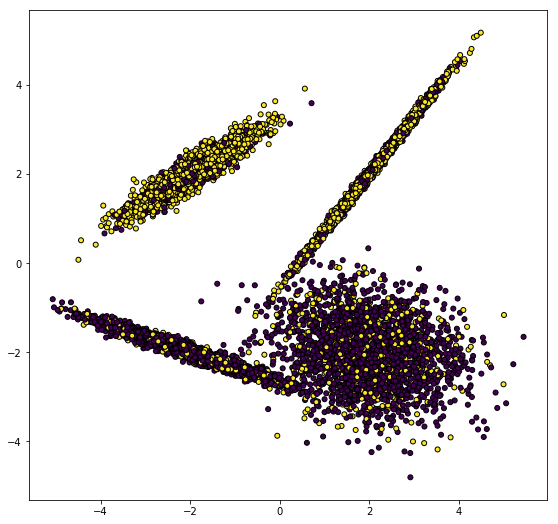

===
KNN
best cv err: 0.20399999999999996,
best_n_neighbours: 17, 
Score: 0.7996666666666666
===

LR best: {'C': 0.1, 'penalty': 'l1'} 

====
Logistic regresion score:	0.801,
KNN score:			0.7996666666666666


In [144]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)


X1, Y1 = make_classification(n_classes=2, n_samples=10000, flip_y=0.4, 
                             n_features=2, n_informative=2, 
                            n_redundant=0, n_clusters_per_class=2, class_sep=2, random_state=50)

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, 
                                                    random_state = 0)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

#KNN

grid_params = {'n_neighbors': [3, 5, 7, 9, 10, 11, 13, 15, 17, 19]}

gs = GSCV(KNN(), grid_params, verbose=1, cv=2, n_jobs = -1)  # using train pipeline
gs_results = gs.fit(X_train, y_train)

best_cv_err = 1 - gs_results.best_score_
best_n_neighbors = gs_results.best_estimator_.n_neighbors

knn = KNN(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

# Logistic regression

logreg=LR()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GSCV(logreg,grid, cv=2)  # using train pipeline
logreg_cv.fit(X_train,y_train)
clf = LR(C=1,penalty=logreg_cv.best_params_['penalty']).fit(X_train, y_train)
lr_score = clf.score(X_test, y_test)


plt.show()
print(f'===\nKNN\nbest cv err: {best_cv_err},\nbest_n_neighbours: {best_n_neighbors}, \nScore: {knn_score}\n===\n\nLR best: {logreg_cv.best_params_} ')
print(f'\n====\nLogistic regresion score:\t{lr_score},\nKNN score:\t\t\t{knn_score}')

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify 

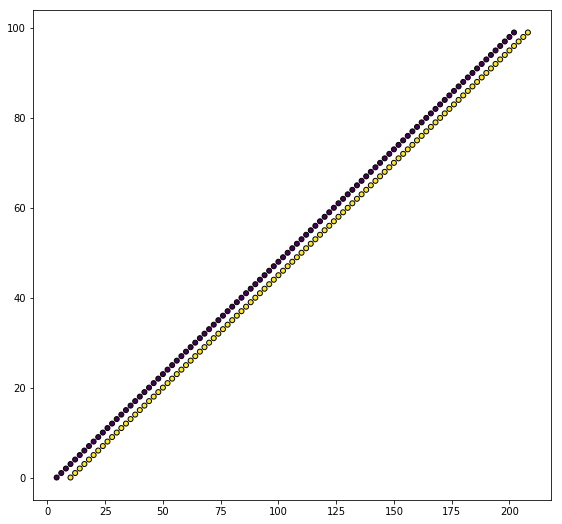

===
KNN
best cv err: 0.5214285714285714,
best_n_neighbours: 3, 
Score: 0.6
===

LR best: {'C': 1.0, 'penalty': 'l1'} 

====
Logistic regresion score:	1.0,
KNN score:			0.6


In [181]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)


X1, Y1 = make_classification(n_classes=2, n_samples=10000, flip_y=0.4, 
                             n_features=2, n_informative=2, 
                            n_redundant=0, n_clusters_per_class=2, class_sep=2, random_state=50)

X1 = []
Y1 = []
for x1 in range(100):
  X1.append([2 * x1 + 4, x1])
  Y1.append(0)
  X1.append([2 * x1 + 10, x1])
  Y1.append(1) 
  
X1 = np.array(X1)

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, 
                                                    random_state = 0)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

#KNN

grid_params = {'n_neighbors': [3, 5, 7, 9, 10, 11, 13, 15, 17, 19]}

gs = GSCV(KNN(), grid_params, verbose=1, cv=2, n_jobs = -1)  # using train pipeline
gs_results = gs.fit(X_train, y_train)

best_cv_err = 1 - gs_results.best_score_
best_n_neighbors = gs_results.best_estimator_.n_neighbors

knn = KNN(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

# Logistic regression

logreg=LR()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GSCV(logreg,grid, cv=2)  # using train pipeline
logreg_cv.fit(X_train,y_train)
clf = LR(C=1,penalty=logreg_cv.best_params_['penalty']).fit(X_train, y_train)
lr_score = clf.score(X_test, y_test)


plt.show()
print(f'===\nKNN\nbest cv err: {best_cv_err},\nbest_n_neighbours: {best_n_neighbors}, \nScore: {knn_score}\n===\n\nLR best: {logreg_cv.best_params_} ')
print(f'\n====\nLogistic regresion score:\t{lr_score},\nKNN score:\t\t\t{knn_score}')

In [182]:
print(f'Logistic regresion score:\t{lr_score},\nKNN score:\t\t\t{knn_score}')

Logistic regresion score:	1.0,
KNN score:			0.6


## Explanation

* Linear regression sets a line, one side of shich there are elements of the first class, and on the other side - elements of the second class.
KNN  selects definite number of neighbours of the element and supprts non-linear solutions whereas LR supports only linear

* In the 1st example we can see 4 clasters of elements, 2 clasters per class. It is harder to found linear prediction function than in the 2nd example. Moreover, flip_y is set 0.4: KNN is better than linear regression when the data have high SNR, and this is not that case. Noise is pretty high, so in the claster of the 1st class we can find elements of the second class, which makes classification more difficult.

* In the 2nd example there are two linear functions `2x + b`. Linear prediction function can be easily found, so the line which separates elements of two different classes is clear. On the other hand, dots are placed close to each other, so when we take N neighbours, about half of them would be of the first class, another half - of the other class (not exact percentage, but it doesn't matter). In that case it would be inefficient to count neighbours, when we can find exact sormula which describes both classes of elements.


# **2. KNN vs Logistic regression**

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklear

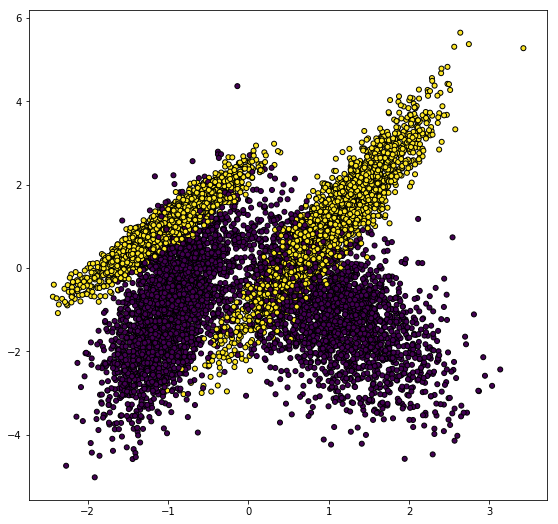

===
best cv err: 0.08714285714285719,
best_n_neighbours: 15, 
Score: 0.9156666666666666
===

LR best: {'C': 0.01, 'penalty': 'l2'} 


In [176]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)


X1, Y1 = make_classification(n_classes=2, n_samples=10000, flip_y=0, 
                             n_features=2, random_state=0, n_informative=2, 
                            n_redundant=0, n_clusters_per_class = 2, class_sep=1)


X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, 
                                                    random_state = 10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


#KNN

grid_params = {'n_neighbors': [3, 5, 7, 9, 10, 11, 13, 15, 17, 19]}

gs = GSCV(KNN(), grid_params, verbose=1, cv=2, n_jobs = -1)  # using train pipeline
gs_results = gs.fit(X_train, y_train)

best_cv_err = 1 - gs_results.best_score_
best_n_neighbors = gs_results.best_estimator_.n_neighbors

knn = KNN(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

# Logistic regression

logreg=LR()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GSCV(logreg,grid, cv=2)  # using train pipeline
logreg_cv.fit(X_train,y_train)
clf = LR(C=1,penalty=logreg_cv.best_params_['penalty']).fit(X_train, y_train)
lr_score = clf.score(X_test, y_test)

plt.show()
print(f'===\nbest cv err: {best_cv_err},\nbest_n_neighbours: {best_n_neighbors}, \nScore: {knn_score}\n===\n\nLR best: {logreg_cv.best_params_} ')


In [177]:
print(f'Logistic regresion score:\t{lr_score},\nKNN score:\t\t\t{knn_score}')

Logistic regresion score:	0.831,
KNN score:			0.9156666666666666


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklear

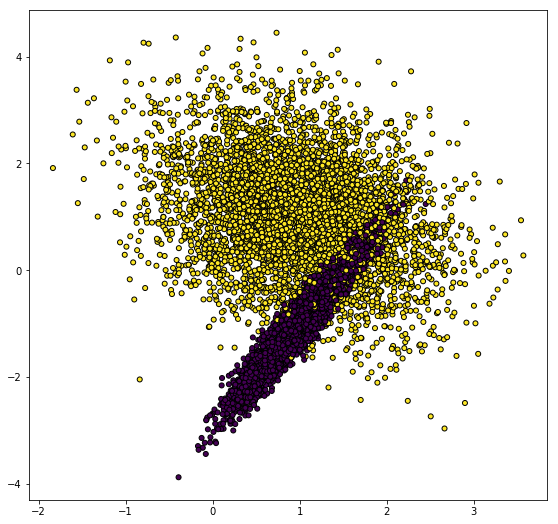

===
best cv err: 0.0535714285714286,
best_n_neighbours: 17, 
Score: 0.948
===

LR best: {'C': 0.01, 'penalty': 'l2'} 
===
Logistic regresion score:	0.8733333333333333,
KNN score:			0.948


In [156]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

X1, Y1 = make_classification(n_classes=2, n_samples=10000, flip_y=0, 
                             n_features=2, random_state=0, n_informative=2, 
                            n_redundant=0, n_clusters_per_class=1, class_sep=1)

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, 
                                                    random_state = 0)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')



#KNN

grid_params = {'n_neighbors': [3, 5, 7, 9, 10, 11, 13, 15, 17, 19]}

gs = GSCV(KNN(), grid_params, verbose=1, cv=2, n_jobs = -1)  # using train pipeline
gs_results = gs.fit(X_train, y_train)

best_cv_err = 1 - gs_results.best_score_
best_n_neighbors = gs_results.best_estimator_.n_neighbors

knn = KNN(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

# Logistic regression

logreg=LR()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GSCV(logreg,grid, cv=2)  # using train pipeline
logreg_cv.fit(X_train,y_train)
clf = LR(C=1,penalty=logreg_cv.best_params_['penalty']).fit(X_train, y_train)
lr_score = clf.score(X_test, y_test)


plt.show()
print(f'===\nbest cv err: {best_cv_err},\nbest_n_neighbours: {best_n_neighbors}, \nScore: {knn_score}\n===\n\nLR best: {logreg_cv.best_params_} ')
print(f'===\nLogistic regresion score:\t{lr_score},\nKNN score:\t\t\t{knn_score}')

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklear

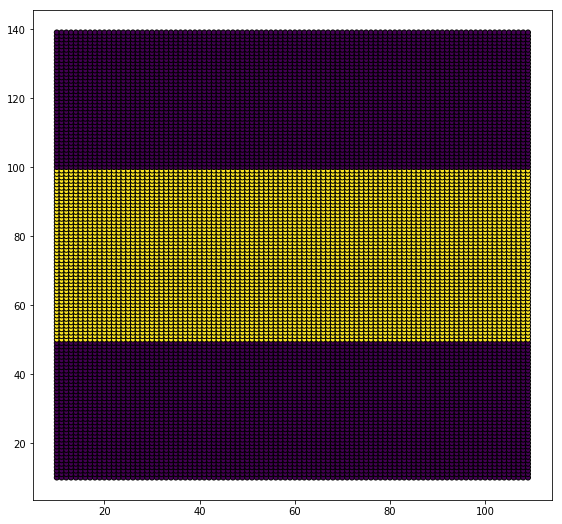

===
KNN
best cv err: 0.007692307692307665,
best_n_neighbours: 19, 
Score: 0.9953846153846154
===

LR best: {'C': 0.001, 'penalty': 'l1'} 

====
Logistic regresion score:	0.598974358974359,
KNN score:			0.9953846153846154


In [155]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)


X1, Y1 = make_classification(n_classes=2, n_samples=10000, flip_y=0.4, 
                             n_features=2, n_informative=2, 
                            n_redundant=0, n_clusters_per_class=2, class_sep=2, random_state=50)

X1 = []
Y1 = []
for x1 in range(40):
  for m in range(100):
      X1.append([10+m, x1+10])
      Y1.append(0)

for x2 in range(50):
  for m in range(100):
      X1.append([10+m, x2+50])
      Y1.append(1)

for x1 in range(40):
  for m in range(100):
      X1.append([10+m, x1+100])
      Y1.append(0)



  
X1 = np.array(X1)

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, 
                                                    random_state = 0)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

#KNN

grid_params = {'n_neighbors': [3, 5, 7, 9, 10, 11, 13, 15, 17, 19]}

gs = GSCV(KNN(), grid_params, verbose=1, cv=2, n_jobs = -1)  # using train pipeline
gs_results = gs.fit(X_train, y_train)

best_cv_err = 1 - gs_results.best_score_
best_n_neighbors = gs_results.best_estimator_.n_neighbors

knn = KNN(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

# Logistic regression

logreg=LR()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GSCV(logreg,grid, cv=2)  # using train pipeline
logreg_cv.fit(X_train,y_train)
clf = LR(C=1,penalty=logreg_cv.best_params_['penalty']).fit(X_train, y_train)
lr_score = clf.score(X_test, y_test)


plt.show()
print(f'===\nKNN\nbest cv err: {best_cv_err},\nbest_n_neighbours: {best_n_neighbors}, \nScore: {knn_score}\n===\n\nLR best: {logreg_cv.best_params_} ')
print(f'\n====\nLogistic regresion score:\t{lr_score},\nKNN score:\t\t\t{knn_score}')

### Explanation

* In all of the examples we deal with non-linear solutions, as we have 3 clasters of elements: one claster of the first class, and 2 clasters of the second class around it (in the 1st example 4 clasters by the way). Linear prediction function cannot be interpreted as a single straight line of type `kx + b `. KNN enables us to take in consideration current area of the surface: most neighbours would be a part of the class needes. Exceptions are borders of the clasters, but the accurace score shows minor influence of that areas on the whole prediction.


# **3. KNN cosine vs KNN euclidian**

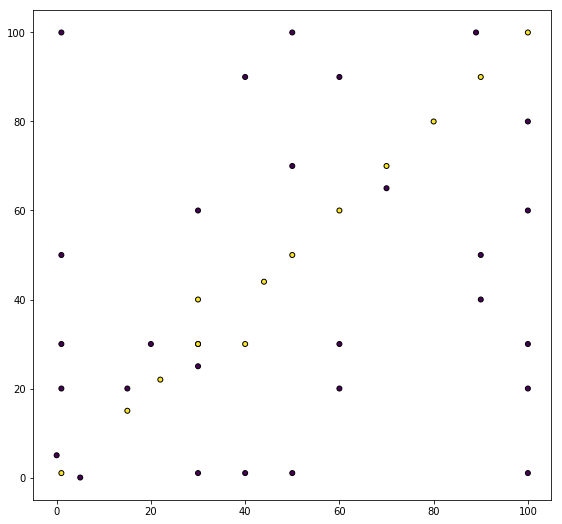

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


===
best cv err: 0.3793103448275862,
best_n_neighbours: 5, 
Score: 0.6153846153846154
=== 
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


===
best cv err: 0.13793103448275867,
best_n_neighbours: 3, 
Score: 0.9230769230769231
===


KNN cosine score:	0.9230769230769231,
KNN euclidean score:	0.6153846153846154




[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [167]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

X1, Y1 = make_classification(n_classes=2, n_samples=10000, flip_y=0.3, 
                             n_features=2, random_state=0, n_informative=2, 
                             n_redundant=0, n_clusters_per_class=2, class_sep=5, 
                             n_repeated=0)


X1 = [[1, 1], [100, 100], [100, 1], [1, 100], [50, 50], [40, 30], 
               [30, 40], [60, 20], [20, 30], [30, 30], [90, 90], [1, 20], 
               [1, 30], [1, 50], [50, 1], [40, 1], [30, 1], [40, 90], [30, 30], 
               [60, 60], [70, 70], [15, 15], [70, 65], [15, 20], [30, 25], 
               [44, 44], [100, 20], [100, 30], [90, 40], [90, 50], [60, 90],
               [5, 0], [0, 5], [80, 80], [30, 60], [60, 30], [89, 100],
               [100, 80], [100, 60], [22, 22], [50, 70], [50, 100]]
Y1 = [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 
      0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
  
X1 = np.array(X1)
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, 
                                                    random_state = 0)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.show()


#KNN Euclidean


grid_params = {'n_neighbors': [3, 5], 'metric' : ['euclidean']}

gs = GSCV(KNN(), grid_params, verbose=1, cv=2, n_jobs = -1)  # using train pipeline
gs_results = gs.fit(X_train, y_train)

best_cv_err = 1 - gs_results.best_score_
best_n_neighbors = gs_results.best_estimator_.n_neighbors

knn_euc = KNN(n_neighbors=best_n_neighbors, metric='euclidean')
knn_euc.fit(X_train, y_train)
knn_euc_score = knn_euc.score(X_test, y_test)

print(f'===\nbest cv err: {best_cv_err},\nbest_n_neighbours: {best_n_neighbors}, \nScore: {knn_euc_score}\n=== ')

# KNN Cosine


grid_params = {'n_neighbors': [3, 5, 7, 10],'metric' : ['cosine']}

gs = GSCV(KNN(), grid_params, verbose=1, cv=2, n_jobs = -1)  # using train pipeline
gs_results = gs.fit(X_train, y_train)

best_cv_err = 1 - gs_results.best_score_
best_n_neighbors = gs_results.best_estimator_.n_neighbors

knn_cos = KNN(n_neighbors=best_n_neighbors,  metric = 'cosine')
knn_cos.fit(X_train, y_train)
knn_cos_score = knn_cos.score(X_test, y_test)

print(f'===\nbest cv err: {best_cv_err},\nbest_n_neighbours: {best_n_neighbors}, \nScore: {knn_cos_score}\n===')
print('\n\n==================================================================')
print(f'KNN cosine score:\t{knn_cos_score},\nKNN euclidean score:\t{knn_euc_score}')
print('==================================================================\n\n')

In [162]:
print(f'KNN cosine score:\t{knn_cos_score},\nKNN euclidian score:\t{knn_euc_score}')

KNN cosine score:	0.9230769230769231,
KNN euclidian score:	0.6153846153846154


### Explanation


  * First class (yellow dots) is a linear function x = y (except 2 dots)
  * Second class - all dots that can do not belong to this function.
  * Cosine of the angle between any 2 dots of this class (except 2) is the same. 
  * Cosine of the angle between any dots of the first class is 1 (except to dots). Another option signs that element belongs to another class. Classification makes easy!
  * Euclidean distance is not the best solution. For example, distance between (20, 21) and (20, 30) is bigger than the distance between (20, 20) and (20, 21), but (20, 21) is not the element of the first class
  

Helpers 

*  [Make classification examples](https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py)
*  [Make classification sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

*   [KNN](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)
*  [KNN](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/)
*   [Grid Search LR](https://www.kaggle.com/enespolat/grid-search-with-logistic-regression)
*   [Grid Search KNN](https://mlbootcamp.ru/article/tutorial/)
*   [Grid Search](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)
*  [Comparative](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222)
*  [Euclidean vs Cosine](https://cmry.github.io/notes/euclidean-v-cosine)